# Adrian Fong

## Research question/interests

My research question: Know many different languages, genre, and game tags are on steam.

# Data Pipeline

```
1. Import numpy 
2. Import pandas 
3. Load data from "steam_games.csv"
```

In [16]:
import numpy as np
import pandas as pd

game = (
    pd.read_csv("../data/raw/steam_games.csv")
)
game

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

#### There is a lot fo NaN value in the dataset, and it needs to be cleaned.

##### Game Name, Reviews, Release Date, Developer, Publisher, Popular tag, language, genre, and price are useful visualizations from the table.
##### Game Name shows the name of the game.
##### Review shows the percentage and number of users comment on the game.
##### Release Date shows the first release date of the game.
##### Developer and Publisher shows the author and company who create the game.
##### Popular tag and Genre shows the category of the game.
##### Language shows how many available language in the game.
##### Price shows the original price of each game.

```
1. Import numpy and pandas
2. Load Dataset file
3. Set rows without "bundle" in "types" column
4. Drop columns that we don't need, such as: "url", "types", "desc_snippet","achievements","game_description","mature_content","minimum_requirements","recommended_requirements" and "discount_price"
5. Rename columns 
6. Filter out columns that has Null value
```

In [3]:
import numpy as np
import pandas as pd

game = (
    pd.read_csv("../data/raw/steam_games.csv")
)
df = (
    game[
    game['types'] != 'bundle']
    .drop(columns= ["url", "types", "desc_snippet","achievements","game_description","mature_content","minimum_requirements","recommended_requirements","discount_price"], inplace=False)
    .drop_duplicates(subset="name", keep='first', inplace=False, ignore_index=False)
    .rename(columns={"name": "Game Name", "recent_reviews": "Recent Review", "all_review": "All Review", "release_date": "Release Date", "developer": "Developer","publisher": "Publisher", "popular_tags": "Game Tags", "game_details": "Game Details", "languages": "Languages", "genre": "Genre", "original_price": "Price"})
    .loc[game["name"].notnull()]
    .loc[game["recent_reviews"].notnull()]
    .loc[game["all_reviews"].notnull()]
    .loc[game["release_date"].notnull()]
    .loc[game["developer"].notnull()]
    .loc[game["publisher"].notnull()]
    .loc[game["popular_tags"].notnull()]
    .loc[game["languages"].notnull()]
    .loc[game["genre"].notnull()]
    .loc[game["original_price"].notnull()]  
)
df

,Game Name,Recent Review,all_reviews,Release Date,Developer,Publisher,Game Tags,Game Details,Languages,Genre,Price
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free
...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,"Mixed,(10),- 40% of the 10 user reviews in the...","Mostly Positive,(61),- 75% of the 61 user revi...","Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99
34570,eSports Legend / 电竞传奇,"Very Positive,(12),- 83% of the 12 user review...","Mixed,(593),- 62% of the 593 user reviews for ...","Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99
35297,KARAKARA,"Very Positive,(19),- 94% of the 19 user review...","Overwhelmingly Positive,(789),- 96% of the 789...","Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99
38390,Moto Racer 4,"Mixed,(19),- 42% of the 19 user reviews in the...","Mixed,(83),- 59% of the 83 user reviews for th...","Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99


#### The string value for "Publisher" has repeated names like 'Microids,Microids'
#### Need to make a function to divide it into 'Microids'

```
1. Import numpy, pandas and re
2. Load the filtered dataset from previous step
3. Make a function 'split_value2' to divide the "Publisher" string value into half (readable string value)
4. Return the split string value
5. Make a function 'split_value1' to replace string value each row in "Publisher" into the split string value
6. Print top 30 rows
```

In [2]:
import numpy as np
import pandas as pd
import re

def split_value2(list, column_name, index):
    if (re.search(',', list[column_name][index])):
        first_half  = list[column_name][index][:len(list[column_name][index])//2]
        return first_half
    elif(list[column_name][index][:len(list[column_name][index])//2] == list['Developer'][index]):
        return list['Developer'][index]
    else:
        return list[column_name][index]

def split_value1(list, column_name):
    count = 0
    temp = []
    for x in list[column_name]:
        if(x != '' and x != 39093909 and x != '(none),(none)'):
            try:
                split = split_value2(list, column_name, count)
                # print(split)
                list[column_name] = list[column_name].replace(list[column_name][count], split)
                # print(list[column_name][count])
            except:
                # print('Row: ', count, ' Value ', x, 'error')
                pass
        count+= 1
    return list

game = (
    pd.read_csv("../data/raw/steam_games.csv")
)
df = (
    game
    [game['types'] != 'bundle']
    .drop(columns= ["url","types", "desc_snippet","achievements","game_description","mature_content","minimum_requirements","recommended_requirements","discount_price"], inplace=False)
    .drop_duplicates(subset="name", keep='first', inplace=False, ignore_index=False)
    .rename(columns={"name": "Game Name", "recent_reviews": "Recent Review", "all_review": "All Review", "release_date": "Release Date", "developer": "Developer","publisher": "Publisher", "popular_tags": "Game Tags", "game_details": "Game Details", "languages": "Languages", "genre": "Genre", "original_price": "Price"})
    # .loc[game["name"].notnull()]
    # .loc[game["recent_reviews"].notnull()]
    # .loc[game["all_reviews"].notnull()]
    .loc[game["release_date"].notnull()]
    .loc[game["developer"].notnull()]
    .loc[game["publisher"].notnull()]
    # .loc[game["popular_tags"].notnull()]
    # .loc[game["languages"].notnull()]
    # .loc[game["genre"].notnull()]
    .loc[game["original_price"].notnull()]   
)
   
df = split_value1(df, 'Publisher')  
# print(df['publisher'][4])
df.head(30)
# df
# df.iloc[-20:]

,Game Name,Recent Review,all_reviews,Release Date,Developer,Publisher,Game Tags,Game Details,Languages,Genre,Price
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free
6,Devil May Cry 5,"Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.",CAPCOM C,"Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,$59.99
7,Human: Fall Flat,"Very Positive,(629),- 91% of the 629 user revi...","Very Positive,(23,763),- 91% of the 23,763 use...","Jul 22, 2016",No Brakes Games,Curve Digital,"Funny,Multiplayer,Co-op,Puzzle,Physics,Local C...","Single-player,Online Multi-Player,Local Co-op,...","English,French,German,Spanish - Spain,Russian,...","Adventure,Indie",$14.99
8,They Are Billions,"Very Positive,(192),- 83% of the 192 user revi...","Very Positive,(12,127),- 85% of the 12,127 use...","Dec 12, 2017",Numantian Games,Numantian Games,"Early Access,Base Building,Strategy,Zombies,Su...","Single-player,Steam Achievements,Steam Trading...","English,Spanish - Spain,French,German,Japanese...","Strategy,Early Access",$29.99
9,Warhammer: Chaosbane,NaN,"Mixed,(904),- 44% of the 904 user reviews for ...","May 31, 2019",Eko Software,Bigben Interactive,"RPG,Adventure,Hack and Slash,Action,Action RPG...","Single-player,Multi-player,Co-op,Online Co-op,...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,RPG",$49.99
10,For The King,"Very Positive,(67),- 80% of the 67 user review...","Very Positive,(4,600),- 83% of the 4,600 user ...","Apr 19, 2018",IronOak Games,Curve Digital,"RPG,Turn-Based Combat,Adventure,Online Co-Op,C...","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...","Adventure,Indie,RPG,Strategy",$19.99


#### The dataset looks a lot cleaner, but the value in column language, game tags and genre are combine together into a string.
#### The string in those 3 columns needed to be clean.

# Analysis

```
1. Import numpy, pandas and re
2. Load Data
3. Make a function that returns a list value from a specific column that has long string seperated with a comma
4. Print list values
```

In [4]:
import numpy as np
import pandas as pd
import re

game = pd.read_csv("../data/raw/steam_games.csv")

def split_value(list, column_name, name, game_name):
    count = 0
    index = -1
    for i in list[name]:
        if (i == game_name):
            index = count
        count+= 1
    
    if(column_name == 'languages'):
        return re.split('[\b\W\b]+',list[column_name][index])
    elif(index != -1):
        return re.split('[;,.]\s*',list[column_name][index])
    else:
        return []

print(split_value(game,'languages', 'name', 'DOOM'))
print(split_value(game,'game_details', 'name', 'DOOM'))
print(split_value(game,'popular_tags', 'name', 'DOOM'))
print(split_value(game,'genre', 'name', 'EVE Online'))
print(split_value(game,'genre', 'name', 'Test'))

['English', 'French', 'Italian', 'German', 'Spanish', 'Spain', 'Japanese', 'Polish', 'Portuguese', 'Brazil', 'Russian', 'Traditional', 'Chinese']
['Single-player', 'Multi-player', 'Co-op', 'Steam Achievements', 'Steam Trading Cards', 'Partial Controller Support', 'Steam Cloud']
['FPS', 'Gore', 'Action', 'Demons', 'Shooter', 'First-Person', 'Great Soundtrack', 'Multiplayer', 'Singleplayer', 'Fast-Paced', 'Sci-fi', 'Horror', 'Classic', 'Atmospheric', 'Difficult', 'Blood', 'Remake', 'Zombies', 'Co-op', 'Memes']
['Action', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy']
[]



### This shows how many different languages and game tags in the game "DOOM"
### Also, it shows the genre for game "EVE Online"
### The last output shows an empty list because the game name "Test" does not exist in the dataset

##### We need to divide all the string into list for each row in column "language", "game tags" and "genre".

```
1. Import numpy, pandas and re
2. Load data
3. Write function to collect unique values from column (Seperate by comma)
4. Return the list with unique values
5. Print unique values from Game Tag and Genre
```

In [3]:
import numpy as np
import pandas as pd
import re

def unique_game_tags(list, column_name, name):
    count = 0
    index = -1
    unique = []
    for x in list[name]:
        temp = []
        for i in list[name]:
            if (i == x):
                index = count
                break
            count+= 1
        try:    
            if(column_name == 'languages'):
                temp = re.split('[\b\W\b]+',list[column_name][index])
            elif(index != -1):
                temp = re.split('[;,.]\s*',list[column_name][index])
            else:
                temp = []
                
            for y in temp:
                confirm = 0
                for z in unique:
                    if(y == z):
                        confirm+=1
                        break
                
                if(confirm == 0):
                    unique.append(y)
        except:
            pass
                
    return unique            
                # and list[column_name][index] != '
    
game = pd.read_csv("../data/raw/steam_games.csv")
df = (
    game
    [game['types'] != 'bundle']
    .drop(columns= ["url","types", "desc_snippet","achievements","game_description","mature_content","minimum_requirements","recommended_requirements","discount_price"], inplace=False)
    .drop_duplicates(subset="name", keep='first', inplace=False, ignore_index=False)
    .rename(columns={"name": "Game Name", "recent_reviews": "Recent Review", "all_review": "All Review", "release_date": "Release Date", "developer": "Developer","publisher": "Publisher", "popular_tags": "Game Tags", "game_details": "Game Details", "languages": "Languages", "genre": "Genre", "original_price": "Price"})
    # .loc[game["name"].notnull()]
    # .loc[game["recent_reviews"].notnull()]
    # .loc[game["all_reviews"].notnull()]
    .loc[game["release_date"].notnull()]
    .loc[game["developer"].notnull()]
    .loc[game["publisher"].notnull()]
    .loc[game["popular_tags"].notnull()]
    # .loc[game["languages"].notnull()]
    # .loc[game["genre"].notnull()]
    .loc[game["original_price"].notnull()]   
)
   

df1 = unique_game_tags(df,'Game Tags', 'Game Name')
print(df1)
print("Number of unique Game Tags: ",len(df1))
df2 = unique_game_tags(df,'Genre', 'Game Name')
print(df2)
print("Number of different Genre: ",len(df2))

['FPS', 'Gore', 'Action', 'Demons', 'Shooter', 'First-Person', 'Great Soundtrack', 'Multiplayer', 'Singleplayer', 'Fast-Paced', 'Sci-fi', 'Horror', 'Classic', 'Atmospheric', 'Difficult', 'Blood', 'Remake', 'Zombies', 'Co-op', 'Memes', 'Survival', 'Battle Royale', 'PvP', 'Third-Person Shooter', 'Online Co-Op', 'Tactical', 'Early Access', 'Strategy', 'Competitive', 'Third Person', 'Team-Based', 'Simulation', 'Stealth', 'Open World', 'Massively Multiplayer', 'Post-apocalyptic', 'Survival Horror', 'Sandbox', 'Adventure', 'Indie', 'Military', 'Hack and Slash', 'Character Action Game', 'Spectacle fighter', 'Violent', 'Stylized', 'Story Rich', 'Nudity', 'Controller', 'Anime', 'Family Friendly', 'RPG', 'Turn-Based Combat', 'Rogue-like', 'Turn-Based', 'Turn-Based Strategy', 'Party-Based RPG', 'Fantasy', 'Board Game', 'Strategy RPG', 'Hex Grid', 'Rogue-lite', 'Local Co-Op', 'Visual Novel', 'Detective', 'Mystery', 'Funny', 'Puzzle', 'Crime', 'Point & Click', 'Comedy', 'Conversation', 'Dynamic Nar

### This first output shows the different game tag in all rows which has 247 game tags on steam.
### the second output shows the unique genre tag in all rows which has 18 different genre on steam.

##### Write a function to add unique values seperate by a comma into a dictionary
```
1. Import numpy, pandas and re
2. Load data
3. Write function to collect unique values from column (Seperate by comma)
4. Return the dictionary with unique values

```

In [96]:
import numpy as np
from langdetect import detect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

game = (
    pd.read_csv("../data/raw/steam_games.csv")
)
df = (
    game
    [game['types'] != 'bundle']
    .drop(columns= ["url","types", "desc_snippet","achievements","game_description","mature_content","minimum_requirements","recommended_requirements","discount_price"], inplace=False)
    .drop_duplicates(subset="name", keep='first', inplace=False, ignore_index=False)
    .rename(columns={"name": "Game Name", "recent_reviews": "Recent Review", "all_review": "All Review", "release_date": "Release Date", "developer": "Developer","publisher": "Publisher", "popular_tags": "Game Tags", "game_details": "Game Details", "languages": "Languages", "genre": "Genre", "original_price": "Price"})
    # .loc[game["name"].notnull()]
    # .loc[game["recent_reviews"].notnull()]
    # .loc[game["all_reviews"].notnull()]
    .loc[game["release_date"].notnull()]
    .loc[game["developer"].notnull()]
    .loc[game["publisher"].notnull()]
    # .loc[game["popular_tags"].notnull()]
    # .loc[game["languages"].notnull()]
    # .loc[game["genre"].notnull()]
    .loc[game["original_price"].notnull()]   
)

def unique_game_tags2(list, column_name, name):
    count = 0
    index = -1
    unique = []
    dict = {}
    for x in list[name]:
        temp = []
        for i in list[name]:
            if (i == x):
                index = count
                break
            count+= 1
        try:    
            if(column_name == 'Languages'):
                temp = re.split('[\b\W\b]+',list[column_name][index])
            elif(index != -1):
                temp = re.split('[;,.]\s*',list[column_name][index])
            else:
                temp = []
                
            for y in temp:
                confirm = 0
                for z in unique:
                    if(y == z):
                        confirm+=1
                        dict[y] += 1
                        break
                
                if(confirm == 0):
                    unique.append(y)
                    dict[y] = 1
        except:
            pass
                
    return dict

#### Use the function 'unique_game_tags2' from above to find how many unique genre tag are in the dataset, and how many games has the genre tag.

```
1. Import operator
2. Load data into the function 'unique_game_tags2'
3. Sort the dictionary of unique Genre tag by descending order
4. Print number of unique values from Genre
```

In [78]:
import operator

df2 = unique_game_tags2(df,'Genre', 'Game Name')
sorted_df2 = dict( sorted(df2.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_df2)

{'Indie': 107, 'Action': 101, 'Adventure': 68, 'Strategy': 58, 'Casual': 53, 'Simulation': 48, 'RPG': 34, 'Massively Multiplayer': 12, 'Sports': 12, 'Early Access': 12, 'Free to Play': 9, 'Racing': 9, 'Audio Production': 1, 'Utilities': 1, 'Education': 1, 'Software Training': 1, 'Design & Illustration': 1, 'Web Publishing': 1}


#### This shows the number of unique genre values in the dataset by descending order.

##### Put the value from dictionary to a bar plot.

```
1. Import matplotlib.pyplot, seaborn and operator
2. Use the sorted dictionary from above
3. Plot a bar plot by the key in dictionary for y axis and value in dictionary for x axis
4. Add a title "Number of different Genre" into the bar plot
5. Add the value after each y axis bar(Types of genre)
6. Show the bar plot
```

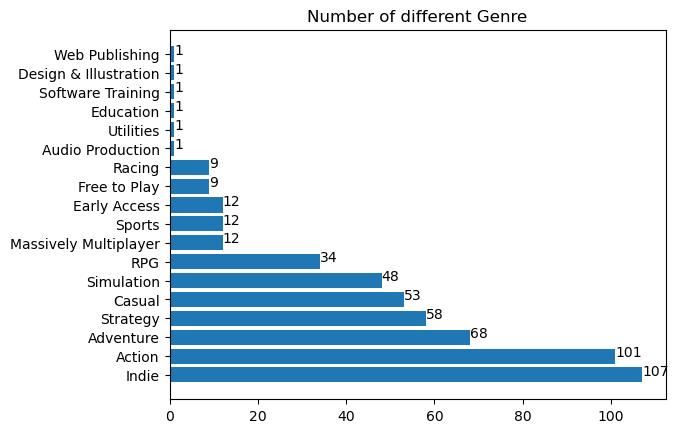

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator

def addlabel2(x,y):
    for i in range(len(x)):
        plt.text(y[i],x[i],y[i])

sorted_df2 = dict( sorted(df2.items(), key=operator.itemgetter(1),reverse=True))
names, counts = zip(*sorted_df2.items())
plt.barh(names, counts)
plt.title("Number of different Genre")
addlabel2(names, counts)
plt.show()


### This graph shows all the numbers of different genre
### Indie is the most used genre tag in steam games which it is in 107 different games.


##### Use the function 'unique_game_tags2' from above to find how many unique game tag are in the dataset, and how many games has the game tag.

```
1. Import operator
2. Load data into the function 'unique_game_tags2'
3. Sort the dictionary of different Game tag by descending order
4. Print number of unique values from Game tag
```

In [2]:
import operator

df1 = unique_game_tags2(df,'Game Tags', 'Game Name')
sorted_df1 = dict( sorted(df1.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_df1)

{'Indie': 119, 'Action': 112, 'Adventure': 91, 'Singleplayer': 76, 'Strategy': 72, 'Casual': 63, 'Simulation': 56, 'Multiplayer': 49, 'RPG': 43, 'Great Soundtrack': 40, 'Early Access': 37, 'Co-op': 33, 'Atmospheric': 32, 'Open World': 30, '2D': 28, 'Story Rich': 25, 'Sandbox': 24, 'Difficult': 23, 'Funny': 21, 'Masterpiece': 21, 'Shooter': 20, 'Sci-fi': 20, 'Third Person': 18, 'Pixel Graphics': 18, 'FPS': 17, 'Puzzle': 17, 'VR': 17, 'First-Person': 16, 'Classic': 16, 'Platformer': 16, 'Horror': 15, 'Survival': 15, 'Anime': 15, 'Family Friendly': 15, 'Fantasy': 15, 'Space': 15, 'Nudity': 14, 'Massively Multiplayer': 13, 'Point & Click': 13, 'Online Co-Op': 12, 'Violent': 12, 'Sports': 12, 'Gore': 11, 'Tactical': 11, 'Comedy': 11, 'Free to Play': 11, 'Building': 11, 'Replay Value': 11, 'Retro': 11, 'Stealth': 10, 'Turn-Based': 10, 'Female Protagonist': 10, 'Realistic': 10, 'Local Co-Op': 9, 'Visual Novel': 9, 'Racing': 9, 'Arcade': 9, 'Hack and Slash': 8, 'Turn-Based Strategy': 8, 'Myste

#### This shows the number of unique Game tag values in the dataset by descending order.

##### Put the value from dictionary to a bar plot.

```
1. Import matplotlib.pyplot, seaborn and operator
2. Use the sorted dictionary from above
3. Plot a bar plot by the key in dictionary for y axis and value in dictionary for x axis
4. Add a title "Number of different Game Tags" into the bar plot
5. Add the value after each y axis bar(Types of game tags)
6. Show the bar plot
```

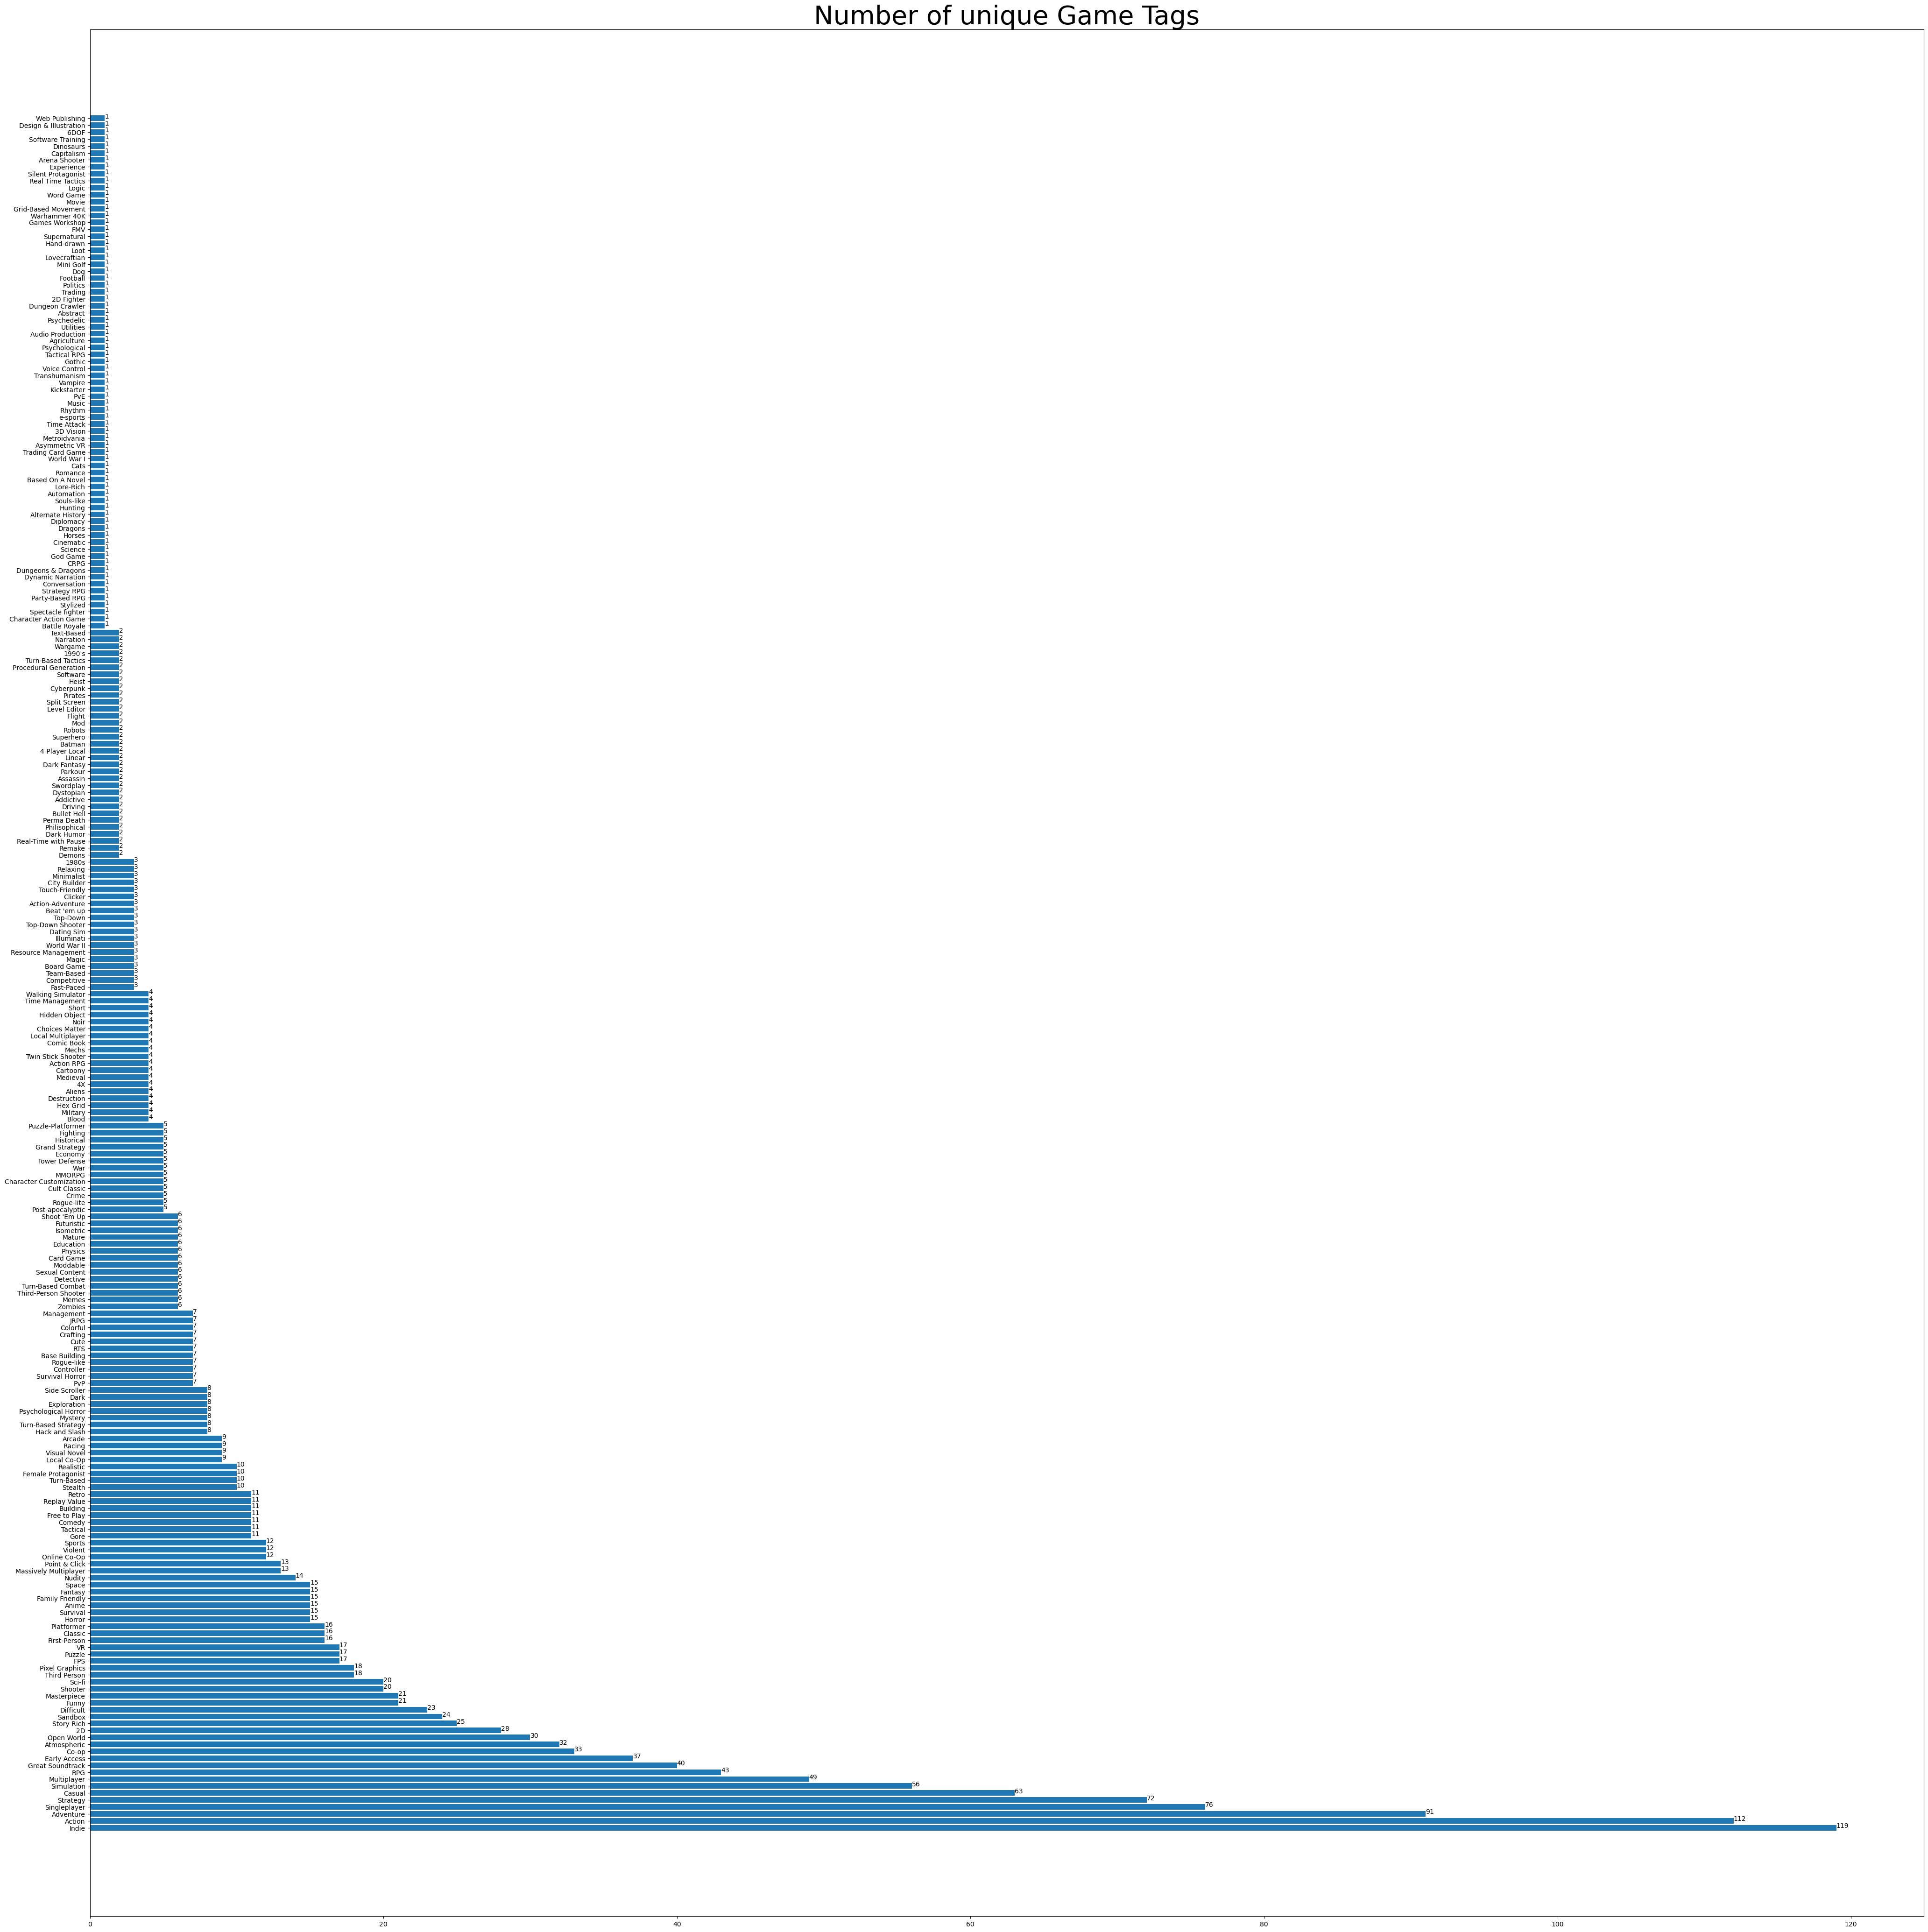

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(y[i],x[i],y[i])

sorted_df1 = dict( sorted(df1.items(), key=operator.itemgetter(1),reverse=True))
fig, ax = plt.subplots(figsize=(40,41))
fig.tight_layout()
names, counts = zip(*sorted_df1.items())
plt.barh(names, counts)
addlabels(names, counts)
plt.title("Number of unique Game Tags", fontsize = 40)

plt.show()

### This graph shows all the numbers of different Game tags
### Indie is the most used Game tag in steam games which it is in 119 different games.
### Action is the second most used Game in steam games which it is in 112 different games.

##### Use the function 'unique_game_tags2' from above to find how many different languages are in the dataset, and how many games has that language.

```
1. Import operator
2. Load data into the function 'unique_game_tags2'
3. Sort the dictionary of different languages by descending order
4. Print number of unique values from Languages
```

In [97]:
import operator

df3 = unique_game_tags2(df,'Languages', 'Game Name')
sorted_df3 = dict( sorted(df3.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_df3)

{'English': 219, 'German': 90, 'Spanish': 88, 'Chinese': 85, 'Spain': 84, 'French': 81, 'Italian': 69, 'Russian': 68, 'Portuguese': 60, 'Japanese': 54, 'Simplified': 49, 'Polish': 43, 'Brazil': 42, 'Korean': 38, 'Traditional': 36, 'Turkish': 19, 'Dutch': 18, 'Czech': 12, 'Finnish': 10, 'Swedish': 10, 'Norwegian': 9, 'Danish': 8, 'Ukrainian': 7, 'Hungarian': 7, 'Greek': 7, 'Arabic': 5, 'Thai': 5, 'Latin': 4, 'America': 4, 'Romanian': 4, 'Bulgarian': 3, 'Vietnamese': 1}


#### This shows the number of different languages in the dataset by descending order.

```
Put the value from dictionary to a bar plot.
```

```
1. Import matplotlib.pyplot, seaborn and operator
2. Use the sorted dictionary from above
3. Plot a bar plot by the key in dictionary for y axis and value in dictionary for x axis
4. Add a title "Number of different Languages" into the bar plot
5. Add the value after each y axis bar(Types of languages)
6. Show the bar plot
```

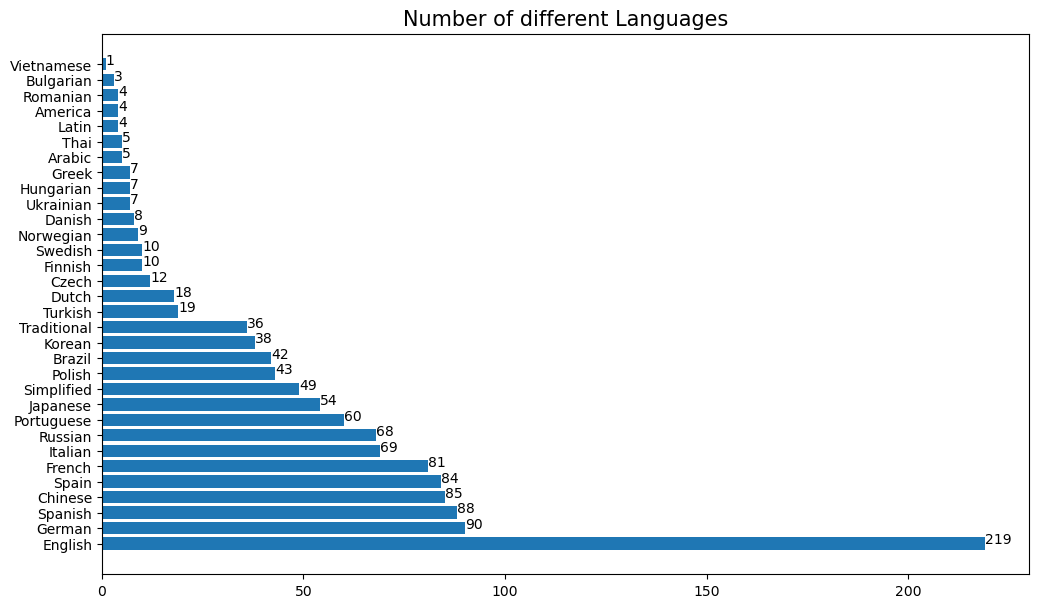

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator

def addlabel3(x,y):
    for i in range(len(x)):
        plt.text(y[i],x[i],y[i])

sorted_df1 = dict( sorted(df1.items(), key=operator.itemgetter(1),reverse=True))
fig, ax = plt.subplots(figsize=(10,6))
fig.tight_layout()
names, counts = zip(*sorted_df3.items())
plt.barh(names, counts)
addlabel3(names, counts)
plt.title("Number of different Languages", fontsize = 15)

plt.show()

### This graph shows all the numbers of different Languages.
### English languages is in most of the steam games which it is in 219 different games.
### German is the second in most of the steam games which it is in 90 different games.
### Spanish is the third in most of the steam games which it is in 88 different games.